# Import dependencies

In [1]:
#import all 
import sys, os
from pandas.io.parsers import read_csv
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn.cluster as cluster
import matplotlib as mpl
import matplotlib.pyplot as plt
import collections
import scipy

import scanpy as sc
dpi = 50
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=dpi, color_map = 'viridis')
sns.set_style('white')
sns.set_context("talk")
#sns.set_style('ticks')

/Users/m.blotenburg/miniconda3/envs/scanpy2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.4.1 scikit-learn==0.23.2 statsmodels==0.12.2 pynndescent==0.5.6


# Import dataframe

In [2]:
pathToData = '/Users/m.blotenburg/Documents/Projects/Mouse_Scartrace/Data_analysis/Scar_analysis/L18/20200715_VAN4787_DynamicExp_ScarProb/'

In [3]:
df = pd.read_pickle(pathToData + 'raw_dataFrame_dynamicData_scarProb.pickle.gz')
df.head()

D0_ESCni  D0_EBni  D1_ESCa  D1_ESCb  D1_ESCc  \
chrom allele site      scar                                                 
1     None   10332400  WT         NaN      NaN      NaN      NaN      NaN   
             10481458  WT         NaN      NaN      NaN      NaN      NaN   
             137974807 WT         NaN      NaN      NaN      NaN      NaN   
             165515794 WT         NaN      NaN      NaN      NaN      NaN   
             193344508 WT         NaN      NaN      NaN      NaN      NaN   

                             D1_ESCd  D1_EBni  D1_EB1a  D1_EB1b  D1_EB1c  ...  \
chrom allele site      scar                                               ...   
1     None   10332400  WT        NaN      NaN      NaN      NaN      NaN  ...   
             10481458  WT        NaN      NaN      NaN      NaN      NaN  ...   
             137974807 WT        NaN      NaN      NaN      NaN      NaN  ...   
             165515794 WT        NaN      NaN      NaN      NaN      NaN  ...   
             193344508 WT        NaN      NaN      NaN      1.0      NaN  ...   

                             D9_EB1a  D9_EB1b  D9_EB1c  D9_EB5a  D9_EB5b  \
chrom allele site      scar                                                
1     None   10332400  WT        NaN      NaN      NaN      NaN      NaN   
             10481458  WT        NaN      NaN      NaN      NaN      NaN   
             137974807 WT        NaN      NaN      NaN      NaN      NaN   
             165515794 WT        NaN      NaN      NaN      NaN      NaN   
             193344508 WT        NaN      NaN      NaN      NaN      NaN   

                             D9_EB5c  sp_A_ni  sp_B_ni  sp_C_ind  sp_D_ind  
chrom allele site      scar                                                 
1     None   10332400  WT        NaN      NaN      NaN       NaN       NaN  
             10481458  WT        NaN      NaN      NaN       NaN       NaN  
             137974807 WT        NaN      NaN      NaN       NaN       NaN  
             165515794 WT        NaN      NaN      NaN       NaN       NaN  
             193344508 WT        NaN      NaN      NaN       NaN       NaN  

[5 rows x 71 columns]

In [4]:
sf = df.loc['12']

sf_129 = sf.loc['129S1_SvImJ']
sf_B6 = sf.loc['C57BL_6NJ']

nonallelic = sf.loc['None']

indexNonAllelic = nonallelic.index.droplevel(0)
sf_nonallelic = nonallelic.copy()
sf_nonallelic.index = indexNonAllelic

# Plot QC

# Load dataframes and make new ones

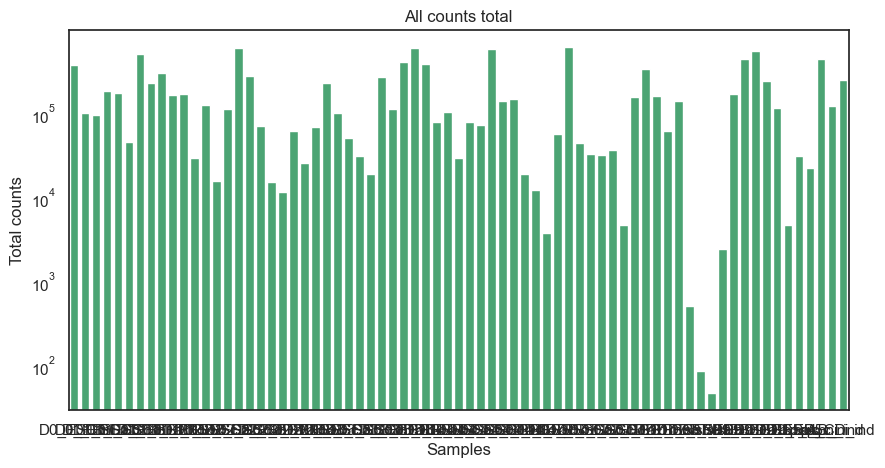

In [5]:
sums_cells_all = df.sum(axis=0)

#all counts total
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_all.index, y=sums_cells_all, log='y',color='mediumseagreen')
ax.set_title('All counts total')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()



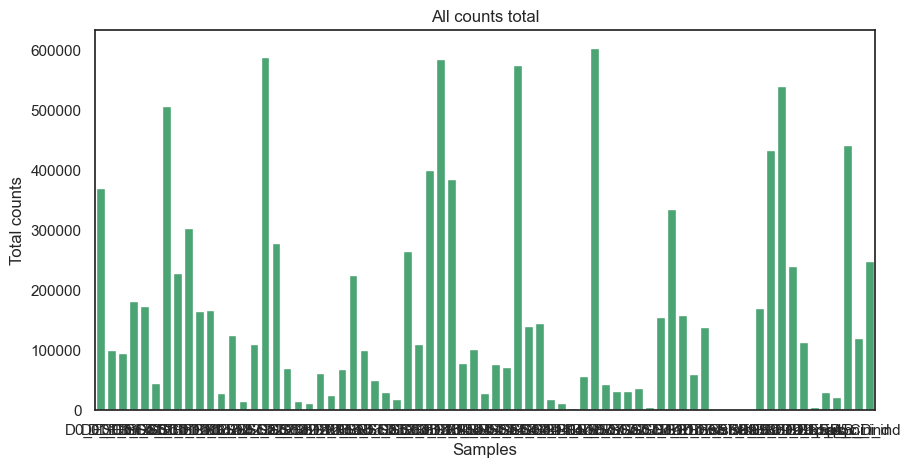

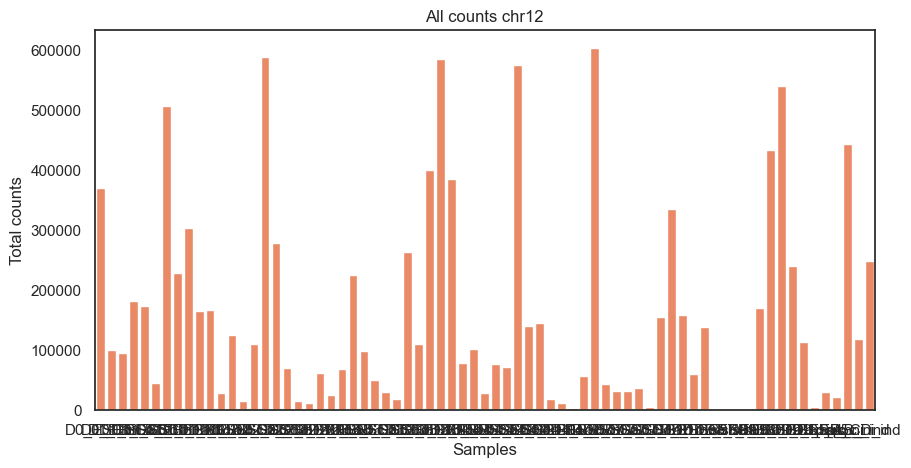

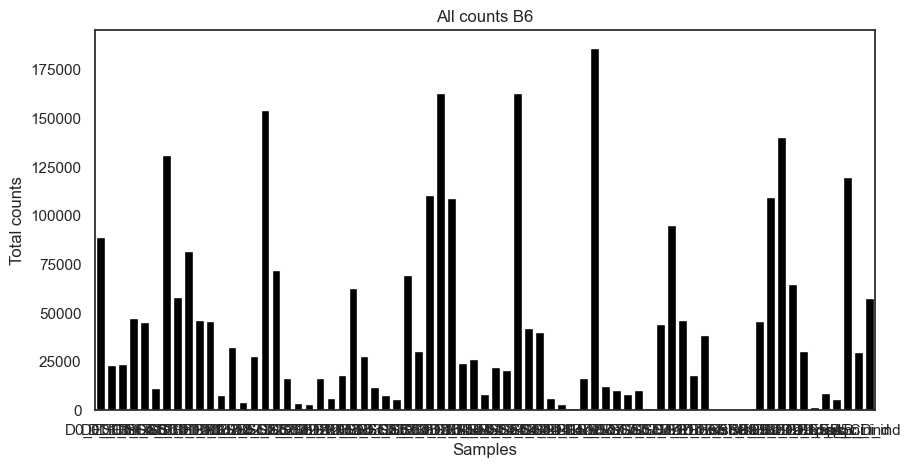

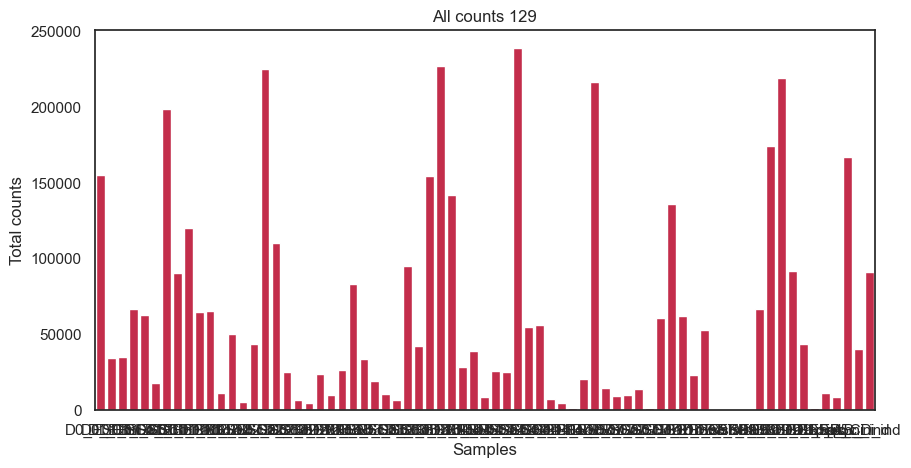

In [6]:
sums_cells_all = df.sum(axis=0)
sums_cells_12 = sf.sum(axis=0)
sums_cells_B6 = sf_B6.sum(axis=0)
sums_cells_129 = sf_129.sum(axis=0)

#all counts total
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_all.index, y=sums_cells_all, color='mediumseagreen')
ax.set_title('All counts total')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#all counts chromosome 12
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_12.index, y=sums_cells_12, color="coral")
ax.set_title('All counts chr12')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

# all counts per allele
#sf.loc['C57BL_6NJ']
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_B6.index, y=sums_cells_B6, color='black')
ax.set_title('All counts B6')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#sf.loc['129S1_SvImJ'].sum(axis=0)
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_129.index, y=sums_cells_129, color='crimson')
ax.set_title('All counts 129')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

/var/folders/pb/hvc2shb53x194_v0c3h_jyccsf3dhb/T/ipykernel_40099/1960193064.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  sums_cells = df.sum(axis=0, level=0)


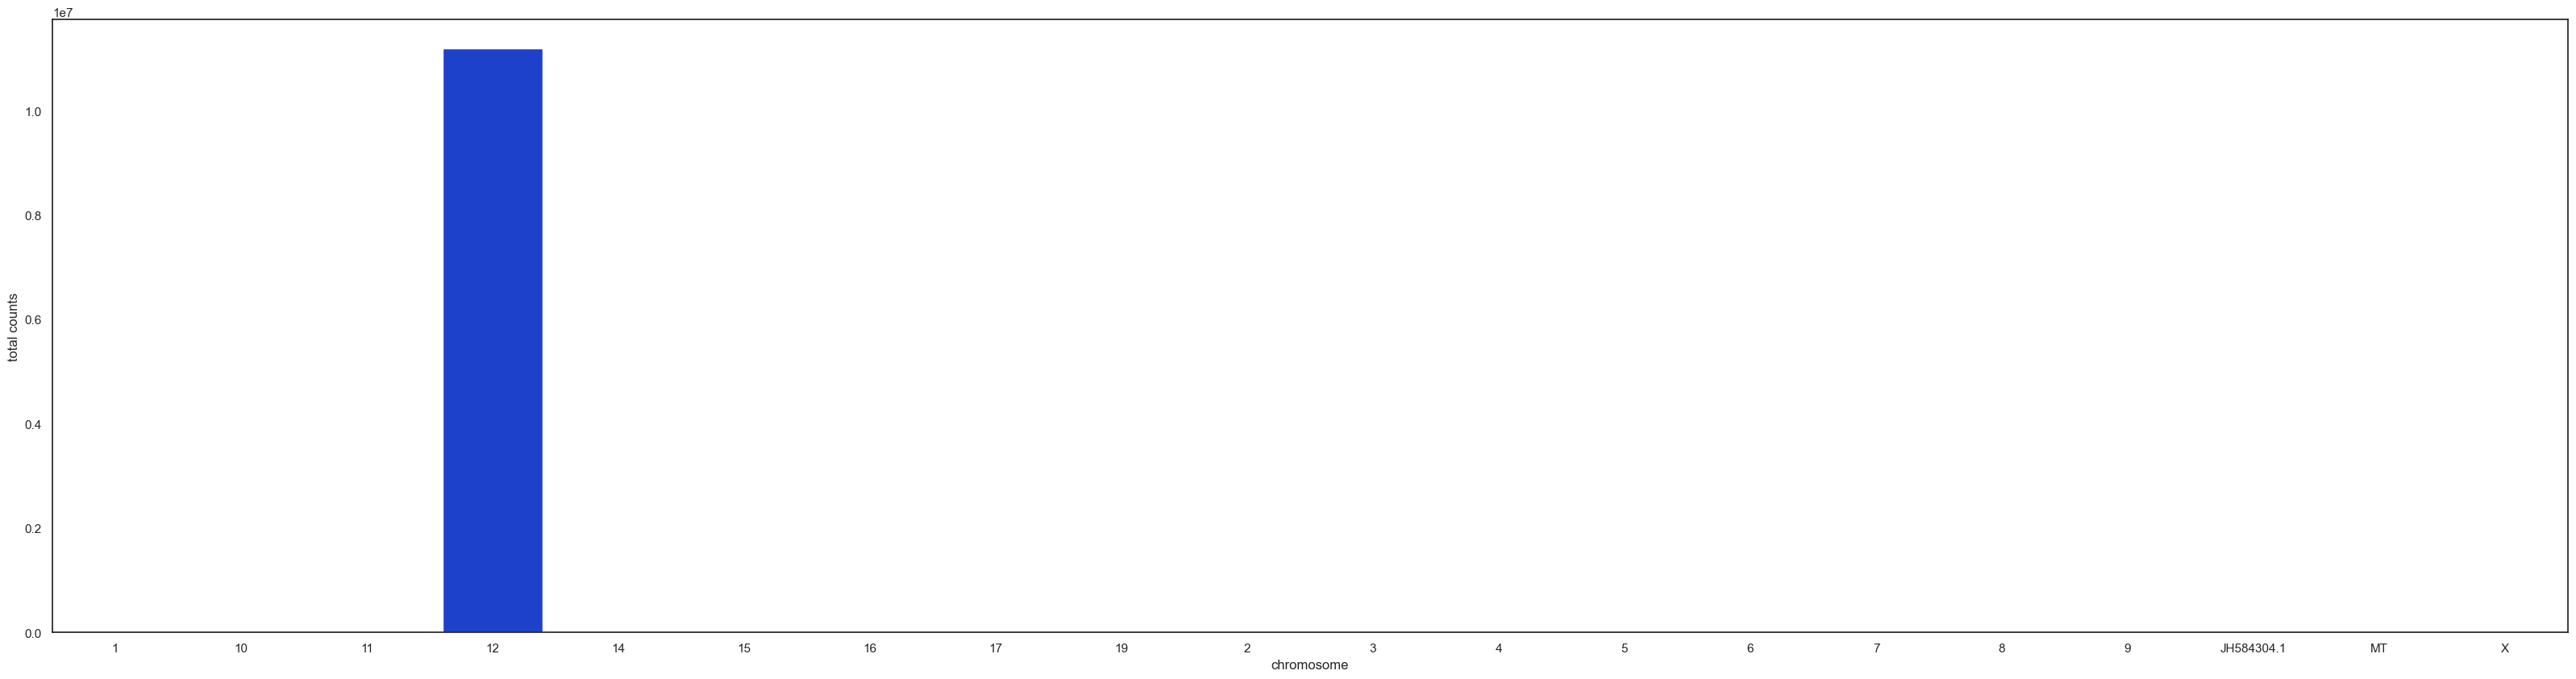

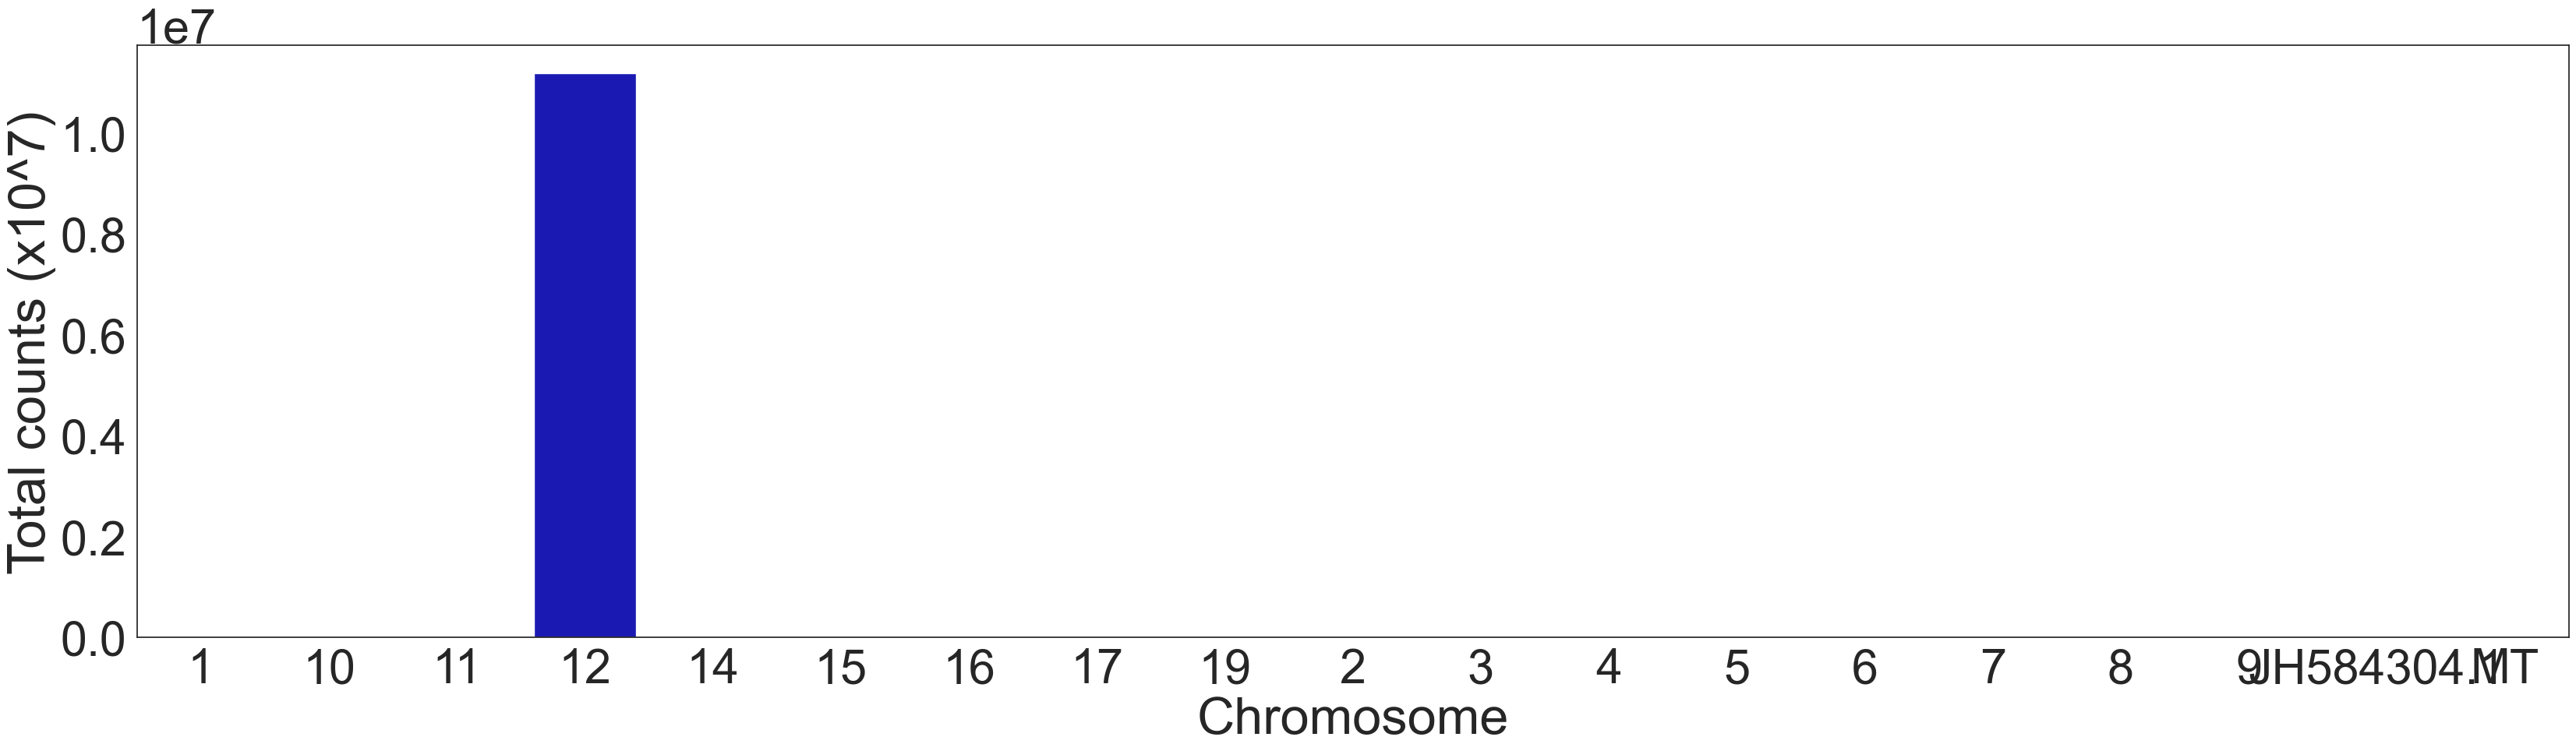

In [7]:
#Plot raw counts per chromosome
sums_cells = df.sum(axis=0, level=0)
countsPerChrom = sums_cells.sum(axis=1)
selection = countsPerChrom.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
#myorder=[0,11,12,13,14,15,16,17,18,1,2,3,4,5,6,7,8,9,10,19,20,]
#selection.index = [ selection.index[i] for i in myorder]

sns.set(style="white")
plt.figure(figsize=(40,10))
ax = sns.barplot(x=countsPerChrom.index, y=countsPerChrom, palette="winter")
ax.set(xlabel='chromosome', ylabel='total counts')
plt.show()

sns.set(style="white", font_scale=4)
plt.figure(figsize=(40,10))
#ax = sns.barplot(x=selection.index, y=selection, palette="winter")
ax = sns.barplot(x=selection.index, y=selection, color='mediumblue')
ax.set(xlabel='Chromosome', ylabel='Total counts (x10^7)')
#ax.tick_params(labelsize=17.5)
#plt.xlabel('Chromosome', fontsize=32); plt.ylabel('Total counts', fontsize=32)

plt.show()

# calculate percentages

In [8]:
sitesB6 = []
sites129 = []
sitesNA = []
for (chrom,allele,site,scar) in df.index:
    if chrom == '12':
        if allele == 'C57BL_6NJ':
            if site not in sitesB6:
                sitesB6.append(site)
        if allele == '129S1_SvImJ':
            if site not in sites129:
                sites129.append(site)
        if allele == 'None':
            if site not in sitesNA:
                sitesNA.append(site)

In [9]:
#129
sf_129 = sf_129.fillna(0)
cellToSiteToScarPercentage129 = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in sf_129.columns:
    for site in sites129:
        if len(sf_129.loc[site])==0:
            continue
        totalReadsForThisSite = sf_129.loc[site, sample].sum()
        if totalReadsForThisSite == 0:
            continue
        for scar, amountOfReads in sf_129.loc[site,sample].iteritems():
            percentage = (amountOfReads / totalReadsForThisSite)*100.0
            #if percentage>0.1:
            cellToSiteToScarPercentage129[sample][int(site)][scar] += percentage

#129
percentagesChrom12 = collections.defaultdict(dict) # (cell, gastruloid)->(site,scar)-> value (.. ,1,2)

for sample, allSitesForThisCell in cellToSiteToScarPercentage129.items():
    for site, allScarsForThisSite in allSitesForThisCell.items():
        for scar, percentage in allScarsForThisSite.most_common(8000000):
            percentagesChrom12[sample][(site,scar)] = percentage

percentagesChr12_129 = pd.DataFrame(percentagesChrom12)

In [10]:
#B6
sf_B6 = sf_B6.fillna(0)
cellToSiteToScarPercentageB6 = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in sf_B6.columns:
    for site in sitesB6:
        if len(sf_B6.loc[site])==0:
            continue
        totalReadsForThisSite = sf_B6.loc[site, sample].sum()
        if totalReadsForThisSite == 0:
            continue
        for scar, amountOfReads in sf_B6.loc[site,sample].iteritems():
            percentage = (amountOfReads / totalReadsForThisSite)*100.0
            #if percentage>0.1:
            cellToSiteToScarPercentageB6[sample][int(site)][scar] += percentage


percentagesChr12B6 = collections.defaultdict(dict) # (cell, gastruloid)->(site,scar)-> value (.. ,1,2)
for sample, allSitesForThisCell in cellToSiteToScarPercentageB6.items():
    for site, allScarsForThisSite in allSitesForThisCell.items():
        for scar, percentage in allScarsForThisSite.most_common(8000000):
            percentagesChr12B6[sample][(site,scar)] = percentage

percentagesChr12_B6 = pd.DataFrame(percentagesChr12B6)



In [ ]:
#nonallelic
sf_nonallelic = sf_nonallelic.fillna(0)                
cellToSiteToScarPercentageNA = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in sf_nonallelic.columns:
    for site in sitesNA:
        if len(sf_nonallelic.loc[site])==0:
            continue
        totalReadsForThisSite = sf_nonallelic.loc[site, sample].sum()
        if totalReadsForThisSite == 0:
            continue
        for scar, amountOfReads in sf_nonallelic.loc[site,sample].iteritems():
            percentage = (amountOfReads / totalReadsForThisSite)*100.0
            #if percentage>0.1:
            cellToSiteToScarPercentageNA[sample][int(site)][scar] += percentage

percentagesChr12NA = collections.defaultdict(dict) # (cell, gastruloid)->(site,scar)-> value (.. ,1,2)
for sample, allSitesForThisCell in cellToSiteToScarPercentageNA.items():
    for site, allScarsForThisSite in allSitesForThisCell.items():
        for scar, percentage in allScarsForThisSite.most_common(8000000):
            percentagesChr12NA[sample][(site,scar)] = percentage

percentagesChr12_NA = pd.DataFrame(percentagesChr12NA)



# plotting

Define colour map

In [11]:
cols=['black',"#C895C5", #"#320033", 
      "#FF6832", "#66E1D3", "#CFCDAC", "#D0AC94", "#7ED379", "#012C58","#008941", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#006FA6", "#A30059","#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80","#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100","#7A7BFF", "#D68E01", "#353339", "#78AFA1", "#FEB2C6", "#75797C", "#837393", "#943A4D", "#B5F4FF", "#D2DCD5", "#9556BD", "#6A714A", "#001325", "#02525F", "#0AA3F7", "#E98176","#DBD5DD", "#5EBCD1", "#3D4F44", "#7E6405", "#02684E", "#962B75", "#8D8546", "#9695C5", "#E773CE", "#D86A78", "#3E89BE", "#CA834E", "#518A87", "#5B113C", "#55813B", "#E704C4", "#00005F", "#A97399", "#4B8160", "#59738A", "#FF5DA7", "#F7C9BF", "#643127", "#513A01","#83AB58", "#001C1E", "#D1F7CE", "#004B28", "#C8D0F6", "#A3A489", "#806C66", "#222800","#BF5650", "#E83000", "#66796D", "#DA007C", "#FF1A59", "#8ADBB4", "#1E0200", "#5B4E51","#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700","#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329","#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C","#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F","#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09","#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66","#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00","#BDC9D2", "#9FA064", "#BE4700", "#658188", "#83A485", "#453C23", "#47675D", "#3A3F00","#061203", "#DFFB71", "#868E7E", "#98D058", "#6C8F7D", "#D7BFC2", "#3C3E6E", "#D83D66","#2F5D9B", "#6C5E46", "#D25B88", "#5B656C", "#00B57F", "#545C46", "#866097", "#365D25","#252F99", "#00CCFF", "#674E60", "#FC009C", "#92896B", "#1E2324", "#DEC9B2", "#9D4948","#85ABB4", "#342142", "#D09685", "#A4ACAC", "#00FFFF", "#AE9C86", "#742A33", "#0E72C5","#AFD8EC", "#C064B9", "#91028C", "#FEEDBF", "#FFB789", "#9CB8E4", "#AFFFD1", "#2A364C","#4F4A43", "#647095", "#34BBFF", "#807781", "#920003", "#B3A5A7", "#018615", "#F1FFC8","#976F5C", "#FF3BC1", "#FF5F6B", "#077D84", "#F56D93", "#5771DA", "#4E1E2A", "#830055","#02D346", "#BE452D", "#00905E", "#BE0028", "#6E96E3", "#007699", "#FEC96D", "#9C6A7D","#3FA1B8", "#893DE3", "#79B4D6", "#7FD4D9", "#6751BB", "#B28D2D", "#E27A05", "#DD9CB8","#AABC7A", "#980034", "#561A02", "#8F7F00", "#635000", "#CD7DAE", "#8A5E2D", "#FFB3E1","#6B6466", "#C6D300", "#0100E2", "#88EC69", "#8FCCBE", "#21001C", "#511F4D", "#E3F6E3","#FF8EB1", "#6B4F29", "#A37F46", "#6A5950", "#1F2A1A", "#04784D", "#101835", "#E6E0D0","#FF74FE", "#00A45F", "#8F5DF8", "#4B0059", "#412F23", "#D8939E", "#DB9D72", "#604143","#B5BACE", "#989EB7", "#D2C4DB", "#A587AF", "#77D796", "#7F8C94", "#FF9B03", "#555196","#31DDAE", "#74B671", "#802647", "#2A373F", "#014A68", "#696628", "#4C7B6D", "#002C27","#7A4522", "#3B5859", "#E5D381", "#FFF3FF", "#679FA0", "#261300", "#2C5742", "#9131AF","#AF5D88", "#C7706A", "#61AB1F", "#8CF2D4", "#C5D9B8", "#9FFFFB", "#BF45CC", "#493941","#863B60", "#B90076", "#003177", "#C582D2", "#C1B394", "#602B70", "#887868", "#BABFB0","#030012", "#D1ACFE", "#7FDEFE", "#4B5C71", "#A3A097", "#E66D53", "#637B5D", "#92BEA5","#6B94AA", "#51A058", "#A45B02", "#1D1702", "#E20027", "#E7AB63", "#4C6001", "#9C6966","#64547B", "#97979E", "#006A66", "#391406", "#F4D749", "#0045D2", "#006C31", "#DDB6D0","#7C6571", "#9FB2A4", "#00D891", "#15A08A", "#BC65E9", "#FFFFFE", "#C6DC99", "#203B3C","#671190", "#6B3A64", "#F5E1FF", "#FFA0F2", "#CCAA35", "#374527", "#8BB400", "#797868","#C6005A", "#3B000A", "#C86240", "#29607C", "#402334", "#7D5A44", "#CCB87C", "#B88183","#AA5199", "#B5D6C3", "#A38469", "#9F94F0", "#A74571", "#B894A6", "#71BB8C", "#00B433","#789EC9", "#6D80BA", "#953F00", "#5EFF03", "#E4FFFC", "#1BE177", "#BCB1E5", "#76912F","#003109", "#0060CD", "#D20096", "#895563", "#29201D", "#5B3213", "#A76F42", "#89412E","#1A3A2A", "#494B5A", "#A88C85", "#F4ABAA", "#A3F3AB", "#00C6C8", "#EA8B66", "#958A9F", "#00F8B3", "#BEDDFF", "#3DB5A7", "#DD3248", "#B6E4DE", "#427745", "#598C5A", "#B94C59","#8181D5", "#94888B", "#FED6BD", "#536D31", "#6EFF92", "#E4E8FF", "#20E200", "#FFD0F2","#4C83A1", "#BD7322", "#915C4E", "#8C4787", "#025117", "#A2AA45", "#2D1B21", "#A9DDB0","#FF4F78", "#528500", "#009A2E", "#17FCE4", "#71555A", "#525D82", "#00195A", "#967874","#555558", "#0B212C", "#1E202B", "#EFBFC4", "#6F9755", "#6F7586", "#501D1D", "#372D00","#741D16", "#5EB393", "#B5B400", "#DD4A38", "#363DFF", "#AD6552", "#6635AF", "#836BBA","#98AA7F", "#464836", "#322C3E", "#7CB9BA", "#5B6965", "#707D3D", "#7A001D", "#6E4636","#443A38", "#AE81FF", "#489079", "#897334", "#009087", "#DA713C", "#361618", "#FF6F01","#006679", "#370E77", "#4B3A83", "#C9E2E6", "#C44170", "#FF4526", "#73BE54", "#C4DF72","#ADFF60", "#00447D", "#DCCEC9", "#BD9479", "#656E5B", "#EC5200", "#FF6EC2", "#7A617E","#DDAEA2", "#77837F", "#A53327", "#608EFF", "#B599D7", "#A50149", "#4E0025", "#C9B1A9","#03919A", "#1B2A25", "#E500F1", "#982E0B", "#B67180", "#E05859", "#006039", "#578F9B","#305230", "#CE934C", "#B3C2BE", "#C0BAC0", "#B506D3", "#170C10", "#4C534F", "#224451","#3E4141", "#78726D", "#B6602B", "#200441", "#DDB588", "#497200", "#C5AAB6", "#033C61","#71B2F5", "#A9E088", "#4979B0", "#A2C3DF", "#784149", "#2D2B17", "#3E0E2F", "#57344C","#0091BE", "#E451D1", "#4B4B6A", "#5C011A", "#7C8060", "#FF9491", "#4C325D", "#005C8B","#E5FDA4", "#68D1B6", "#032641", "#140023", "#8683A9", "#CFFF00", "#A72C3E", "#34475A","#B1BB9A", "#B4A04F", "#8D918E", "#A168A6", "#813D3A", "#425218", "#DA8386", "#776133","#563930", "#8498AE", "#90C1D3", "#B5666B", "#9B585E", "#856465", "#AD7C90", "#E2BC00","#E3AAE0", "#B2C2FE", "#FD0039", "#009B75", "#FFF46D", "#E87EAC", "#DFE3E6", "#848590","#AA9297", "#83A193", "#577977", "#3E7158", "#C64289", "#EA0072", "#C4A8CB", "#55C899","#E78FCF", "#004547", "#F6E2E3", "#966716", "#378FDB", "#435E6A", "#DA0004", "#1B000F","#5B9C8F", "#6E2B52", "#011115", "#E3E8C4", "#AE3B85", "#EA1CA9", "#FF9E6B", "#457D8B","#92678B", "#00CDBB", "#9CCC04", "#002E38", "#96C57F", "#CFF6B4", "#492818", "#766E52","#20370E", "#E3D19F", "#2E3C30", "#B2EACE", "#F3BDA4", "#A24E3D", "#976FD9", "#8C9FA8","#7C2B73", "#4E5F37", "#5D5462", "#90956F", "#6AA776", "#DBCBF6", "#DA71FF", "#987C95","#52323C", "#BB3C42", "#584D39", "#4FC15F", "#A2B9C1", "#79DB21", "#1D5958", "#BD744E","#160B00", "#20221A", "#6B8295", "#00E0E4", "#102401", "#1B782A", "#DAA9B5", "#B0415D","#859253", "#97A094", "#06E3C4", "#47688C", "#7C6755", "#075C00", "#7560D5", "#7D9F00","#C36D96", "#4D913E", "#5F4276", "#FCE4C8", "#303052", "#4F381B", "#E5A532", "#706690","#AA9A92", "#237363", "#73013E", "#FF9079", "#A79A74", "#029BDB", "#FF0169", "#C7D2E7","#CA8869", "#80FFCD", "#BB1F69", "#90B0AB", "#7D74A9", "#FCC7DB", "#99375B", "#00AB4D","#ABAED1", "#BE9D91", "#E6E5A7", "#332C22", "#DD587B", "#F5FFF7", "#5D3033", "#6D3800","#FF0020", "#B57BB3", "#D7FFE6", "#C535A9", "#260009", "#6A8781", "#A8ABB4", "#D45262","#794B61", "#4621B2", "#8DA4DB", "#C7C890", "#6FE9AD", "#A243A7", "#B2B081", "#181B00","#286154", "#4CA43B", "#6A9573", "#A8441D", "#5C727B", "#738671", "#D0CFCB", "#897B77","#1F3F22", "#4145A7", "#DA9894", "#A1757A", "#63243C", "#ADAAFF", "#00CDE2", "#DDBC62","#698EB1", "#208462", "#00B7E0", "#614A44", "#9BBB57", "#7A5C54", "#857A50", "#766B7E","#014833", "#FF8347", "#7A8EBA", "#274740", "#946444", "#EBD8E6", "#646241", "#373917","#6AD450", "#81817B", "#D499E3", "#979440", "#011A12", "#526554", "#B5885C", "#A499A5","#03AD89", "#B3008B", "#E3C4B5", "#96531F", "#867175", "#74569E", "#617D9F", "#E70452","#067EAF", "#A697B6", "#B787A8", "#9CFF93", "#311D19", "#3A9459", "#6E746E", "#B0C5AE","#84EDF7", "#ED3488", "#754C78", "#384644", "#C7847B", "#00B6C5", "#7FA670", "#C1AF9E","#2A7FFF", "#72A58C", "#FFC07F", "#9DEBDD", "#D97C8E", "#7E7C93", "#62E674", "#B5639E","#FFA861", "#C2A580", "#8D9C83", "#B70546", "#372B2E", "#0098FF", "#985975", "#20204C","#FF6C60", "#445083", "#8502AA", "#72361F", "#9676A3", "#484449", "#CED6C2", "#3B164A","#CCA763", "#2C7F77", "#02227B", "#A37E6F", "#CDE6DC", "#CDFFFB", "#BE811A", "#F77183","#EDE6E2", "#CDC6B4", "#FFE09E", "#3A7271", "#FF7B59", "#4E4E01", "#4AC684", "#8BC891","#BC8A96", "#CF6353", "#DCDE5C", "#5EAADD", "#F6A0AD", "#E269AA", "#A3DAE4", "#436E83","#002E17", "#ECFBFF", "#A1C2B6", "#50003F", "#71695B", "#67C4BB", "#536EFF", "#5D5A48","#890039", "#969381", "#371521", "#5E4665", "#AA62C3", "#8D6F81", "#2C6135", "#410601","#564620", "#E69034", "#6DA6BD", "#E58E56", "#E3A68B", "#48B176", "#D27D67", "#B5B268","#7F8427", "#FF84E6", "#435740", "#EAE408", "#F4F5FF", "#325800", "#4B6BA5", "#ADCEFF","#9B8ACC", "#885138", "#5875C1", "#7E7311", "#FEA5CA", "#9F8B5B", "#A55B54", "#89006A","#AF756F", "#2A2000", "#7499A1", "#FFB550", "#00011E", "#D1511C", "#688151", "#BC908A","#78C8EB", "#8502FF", "#483D30", "#C42221", "#5EA7FF", "#785715", "#0CEA91", "#FFFAED","#B3AF9D", "#3E3D52", "#5A9BC2", "#9C2F90", "#8D5700", "#ADD79C", "#00768B", "#337D00","#C59700", "#3156DC", "#944575", "#ECFFDC", "#D24CB2", "#97703C", "#4C257F", "#9E0366","#88FFEC", "#B56481", "#396D2B", "#56735F", "#988376", "#9BB195", "#A9795C", "#E4C5D3","#9F4F67", "#1E2B39", "#664327", "#AFCE78", "#322EDF", "#86B487", "#C23000", "#ABE86B","#96656D", "#250E35", "#A60019", "#0080CF", "#CAEFFF", "#323F61", "#A449DC", "#6A9D3B","#FF5AE4", "#636A01", "#D16CDA", "#736060", "#FFBAAD", "#D369B4", "#FFDED6", "#6C6D74","#927D5E", "#845D70", "#5B62C1", "#2F4A36", "#E45F35", "#FF3B53", "#AC84DD", "#762988","#70EC98", "#408543", "#2C3533", "#2E182D", "#323925", "#19181B", "#2F2E2C", "#023C32","#9B9EE2", "#58AFAD", "#5C424D", "#7AC5A6", "#685D75", "#B9BCBD", "#834357", "#1A7B42","#2E57AA", "#E55199", "#316E47", "#CD00C5", "#6A004D", "#7FBBEC", "#F35691", "#D7C54A","#62ACB7", "#CBA1BC", "#A28A9A", "#6C3F3B", "#FFE47D", "#DCBAE3", "#5F816D", "#3A404A","#7DBF32", "#E6ECDC", "#852C19", "#285366", "#B8CB9C", "#0E0D00", "#4B5D56", "#6B543F","#E27172", "#0568EC", "#2EB500", "#D21656", "#EFAFFF", "#682021", "#2D2011", "#DA4CFF","#70968E", "#FF7B7D", "#4A1930", "#E8C282", "#E7DBBC", "#A68486", "#1F263C", "#36574E","#52CE79", "#ADAAA9", "#8A9F45", "#6542D2", "#00FB8C", "#5D697B", "#CCD27F", "#94A5A1","#790229", "#E383E6", "#7EA4C1", "#4E4452", "#4B2C00", "#620B70", "#314C1E", "#874AA6","#E30091", "#66460A", "#EB9A8B", "#EAC3A3", "#98EAB3", "#AB9180", "#B8552F", "#1A2B2F","#94DDC5", "#9D8C76", "#9C8333", "#94A9C9", "#392935", "#8C675E", "#CCE93A", "#917100","#01400B", "#449896", "#1CA370", "#E08DA7", "#8B4A4E", "#667776", "#4692AD", "#67BDA8","#69255C", "#D3BFFF", "#4A5132", "#7E9285", "#77733C", "#E7A0CC", "#51A288", "#2C656A","#4D5C5E", "#C9403A", "#DDD7F3", "#005844", "#B4A200", "#488F69", "#858182", "#D4E9B9","#3D7397", "#CAE8CE", "#D60034", "#AA6746", "#9E5585", "#BA6200"]



Select scar target sites only

In [12]:
targetsites = [114682729, 14708745, 114723869, 114740505,114746371, 114788470, 114843748, 114851288,
          114879985,114896335,114910108,114914696,114736342]
sites129 = []
for site in percentagesChr12_129.index.levels[0].unique():
    if site in targetsites:
        sites129.append(site)
sitesB6 = []
for site in percentagesChr12_B6.index.levels[0].unique():
    if site in targetsites:
        sitesB6.append(site)        
        
selectedpercentagesChr12_129 = percentagesChr12_129.loc[sites129] 
selectedpercentagesChr12_B6 = percentagesChr12_B6.loc[sitesB6] 



In [13]:
#coverage of sites:
sums129 = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))

for site in sites129:
    sums129[site] = selectedpercentagesChr12_129.droplevel(1).loc[(site)].sum()
    
#coverage of sites:
sumsb6 = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))

for site in sitesB6:
    sumsb6[site] = selectedpercentagesChr12_B6.droplevel(1).loc[(site)].sum()

In [14]:
selectedpercentagesChr12_129 = selectedpercentagesChr12_129.drop(index = [114910108,114740505])

To plot all target sites for 1 sample:

In [15]:
def plotTargetSites(sample, legend = 'no'):

    allSites4 = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))

    for site, scar in selectedpercentagesChr12_129[sample].index:
        allSites4[scar][('129', site)] = percentagesChr12_129[sample].loc[(site,scar)]
    for site, scar in selectedpercentagesChr12_B6[sample].index:
        allSites4[scar][('B6', site)] = percentagesChr12_B6[sample].loc[(site,scar)]

    allSites4 = pd.DataFrame(allSites4)

    sns.set_style('white')
    sns.set_context("talk")
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    mpl.rcParams['font.family'] = 'Arial'
    fontsize = 30
    ax = pd.DataFrame(allSites4).plot.bar(stacked=True,figsize=(15,5),fontsize = 25,width=0.90, color=cols)
    ax.set_xlabel("Target sites",fontsize=fontsize)
    ax.set_title('Scar profile of ' + str(sample), fontsize=fontsize)
    ax.set_ylabel("Percentage of scars",fontsize=fontsize)
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticklabels("")
    sns.despine()
    sns.set_style('white')
    sns.set_context("talk")
    #'ax.legend(bbox_to_anchor=(0.9,-0.1))
    if legend == 'no':
        ax.legend([],frameon=False)
    elif legend == 'yes':
        ax.legend(bbox_to_anchor=(0.9,-0.1))

/Users/m.blotenburg/miniconda3/envs/scanpy2/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


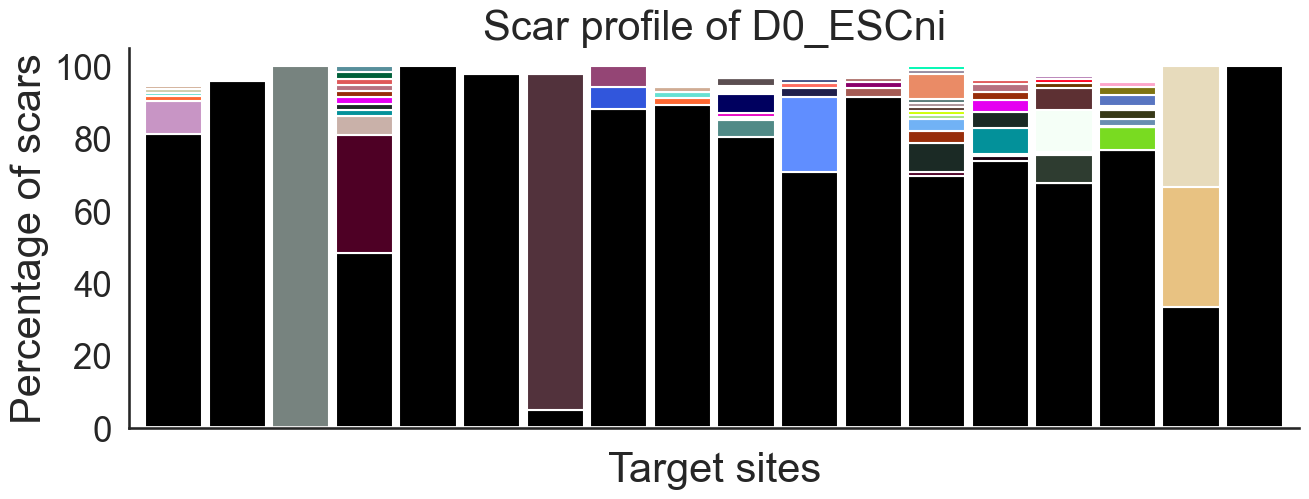

In [17]:
plotTargetSites('D0_ESCni')

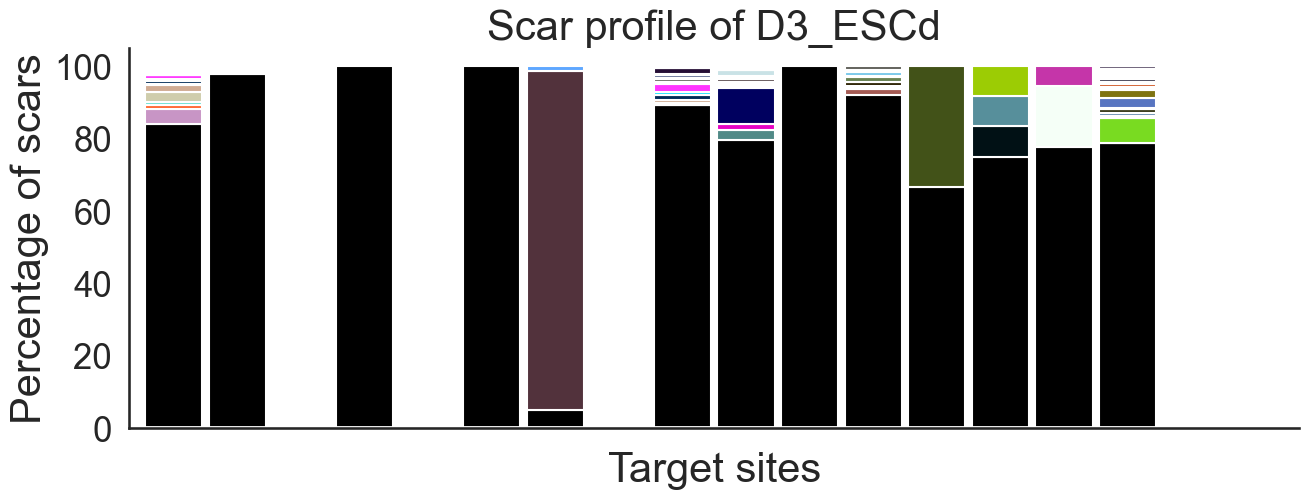

In [18]:
plotTargetSites('D3_ESCd')

Reformat to plot the sum of all target sites so we can compare samples

In [19]:
allSitesPerSample = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))

dict2 = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in selectedpercentagesChr12_129.columns:
    for site, scar in selectedpercentagesChr12_129[sample].index:
        allSitesPerSample[scar][('129', site)] = percentagesChr12_129[sample].loc[(site,scar)]
    for site, scar in selectedpercentagesChr12_B6[sample].index:
        allSitesPerSample[scar][('B6', site)] = percentagesChr12_B6[sample].loc[(site,scar)]

    allSitesPerSample = pd.DataFrame(allSitesPerSample)
    allSitesPerSample = allSitesPerSample[allSitesPerSample.sum(axis=1) > 0]
    #collapsed = pd.DataFrame((allSitesPerSample/len(allSitesPerSample)).sum(axis=0)).T.rename(index = {0:sample})
    dict2[sample] = (allSitesPerSample/len(allSitesPerSample)).sum(axis=0)
    collapsed = pd.DataFrame(dict2)
    print(sample)

D0_ESCni
D0_EBni
D1_ESCa
D1_ESCb
D1_ESCc
D1_ESCd
D1_EBni
D1_EB1a
D1_EB1b
D1_EB1c
D1_EB5a
D1_EB5b
D1_EB5c
D2_ESCa
D2_ESCb
D2_ESCc
D2_ESCd
D2_EBni
D2_EB1a
D2_EB1b
D2_EB1c
D2_EB5a
D2_EB5b
D2_EB5c
D3_ESCa
D3_ESCb
D3_ESCc
D3_ESCd
D3_EBni
D3_EB1a
D3_EB1b
D3_EB1c
D3_EB5a
D3_EB5b
D3_EB5c
D4_ESCa
D4_ESCb
D4_ESCc
D4_ESCd
D4_EB1a
D4_EB1b
D4_EB1c
D4_EB5a
D4_EB5b
D4_EB5c
D4_EBni
D7_ESCa
D7_ESCb
D7_ESCc
D7_ESCd
D7_EB1a
D7_EB1b
D7_EB1c
D7_EBni
D7_EB5a
D7_EB5b
D7_sEBd
D7_sEBa
D7_sEBb
D7_sEBc
D9_EBni
D9_EB1a
D9_EB1b
D9_EB1c
D9_EB5a
D9_EB5b
D9_EB5c
sp_A_ni
sp_B_ni
sp_C_ind
sp_D_ind


In [27]:
selection = 'EB'
selection2 = 'EB1'
selection3 = 'sEB'
percentagepersite = []

for cell in collapsed:
    if selection in cell:
        if selection2 not in cell:
            percentagepersite.append(collapsed[cell].dropna())
        
percentagepersitepd = pd.DataFrame(percentagepersite)

In [28]:
percentagepersitepd = percentagepersitepd.drop(index=['D7_sEBa','D7_sEBb','D7_sEBd'])

In [29]:
percentagepersitepd = percentagepersitepd.reindex(['D0_EBni', 
                             'D1_EB5a', 'D1_EB5b', 'D1_EB5c', 'D1_EBni',
                             'D2_EB5a', 'D2_EB5b', 'D2_EB5c','D2_EBni',
                             'D3_EB5a', 'D3_EB5b','D3_EB5c', 'D3_EBni',
                             'D4_EB5a', 'D4_EB5b', 'D4_EB5c', 'D4_EBni', 
                             'D7_EB5a', 'D7_EB5b','D7_sEBc', 'D7_EBni',
                             'D9_EB5a', 'D9_EB5b', 'D9_EB5c','D9_EBni'])

In [30]:
percentagepersitepd.index = percentagepersitepd.index.str.replace('D7_sEBc', 'D7_EB5c').str.replace('D._', '').str.replace('EB5a', 'A').str.replace('EB5b','B').str.replace('EB5c','C').str.replace('EBd','NI').str.replace('EBni','NI')




/var/folders/pb/hvc2shb53x194_v0c3h_jyccsf3dhb/T/ipykernel_40099/1249412452.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  percentagepersitepd.index = percentagepersitepd.index.str.replace('D7_sEBc', 'D7_EB5c').str.replace('D._', '').str.replace('EB5a', 'A').str.replace('EB5b','B').str.replace('EB5c','C').str.replace('EBd','NI').str.replace('EBni','NI')


In [31]:
def plotAllSamples(df, title = 'Scar profile', x = 'Days after induction'):
    sns.set_style('white')
    sns.set_context("talk")
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    mpl.rcParams['font.family'] = 'Arial'
    fontsize = 30
    ax = df.plot.bar(stacked=True,figsize=(15,5),fontsize = 25,width=0.90, color=cols)
    ax.set_xlabel(x,fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    ax.set_ylabel("Percentage of scars",fontsize=fontsize)
    #ax.tick_params(axis='x', rotation=45)
    #ax.set_xticklabels("")
    #ax.set_xticklabels(rotation=45, ha='right')
    ax.tick_params(axis = 'x',rotation=0)
    #plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
    ax.set_ylim([0,100])
    sns.despine()
    sns.set_style('ticks')
    sns.set_context("talk")
    #'ax.legend(bbox_to_anchor=(0.9,-0.1))
    ax.legend([],frameon=False)

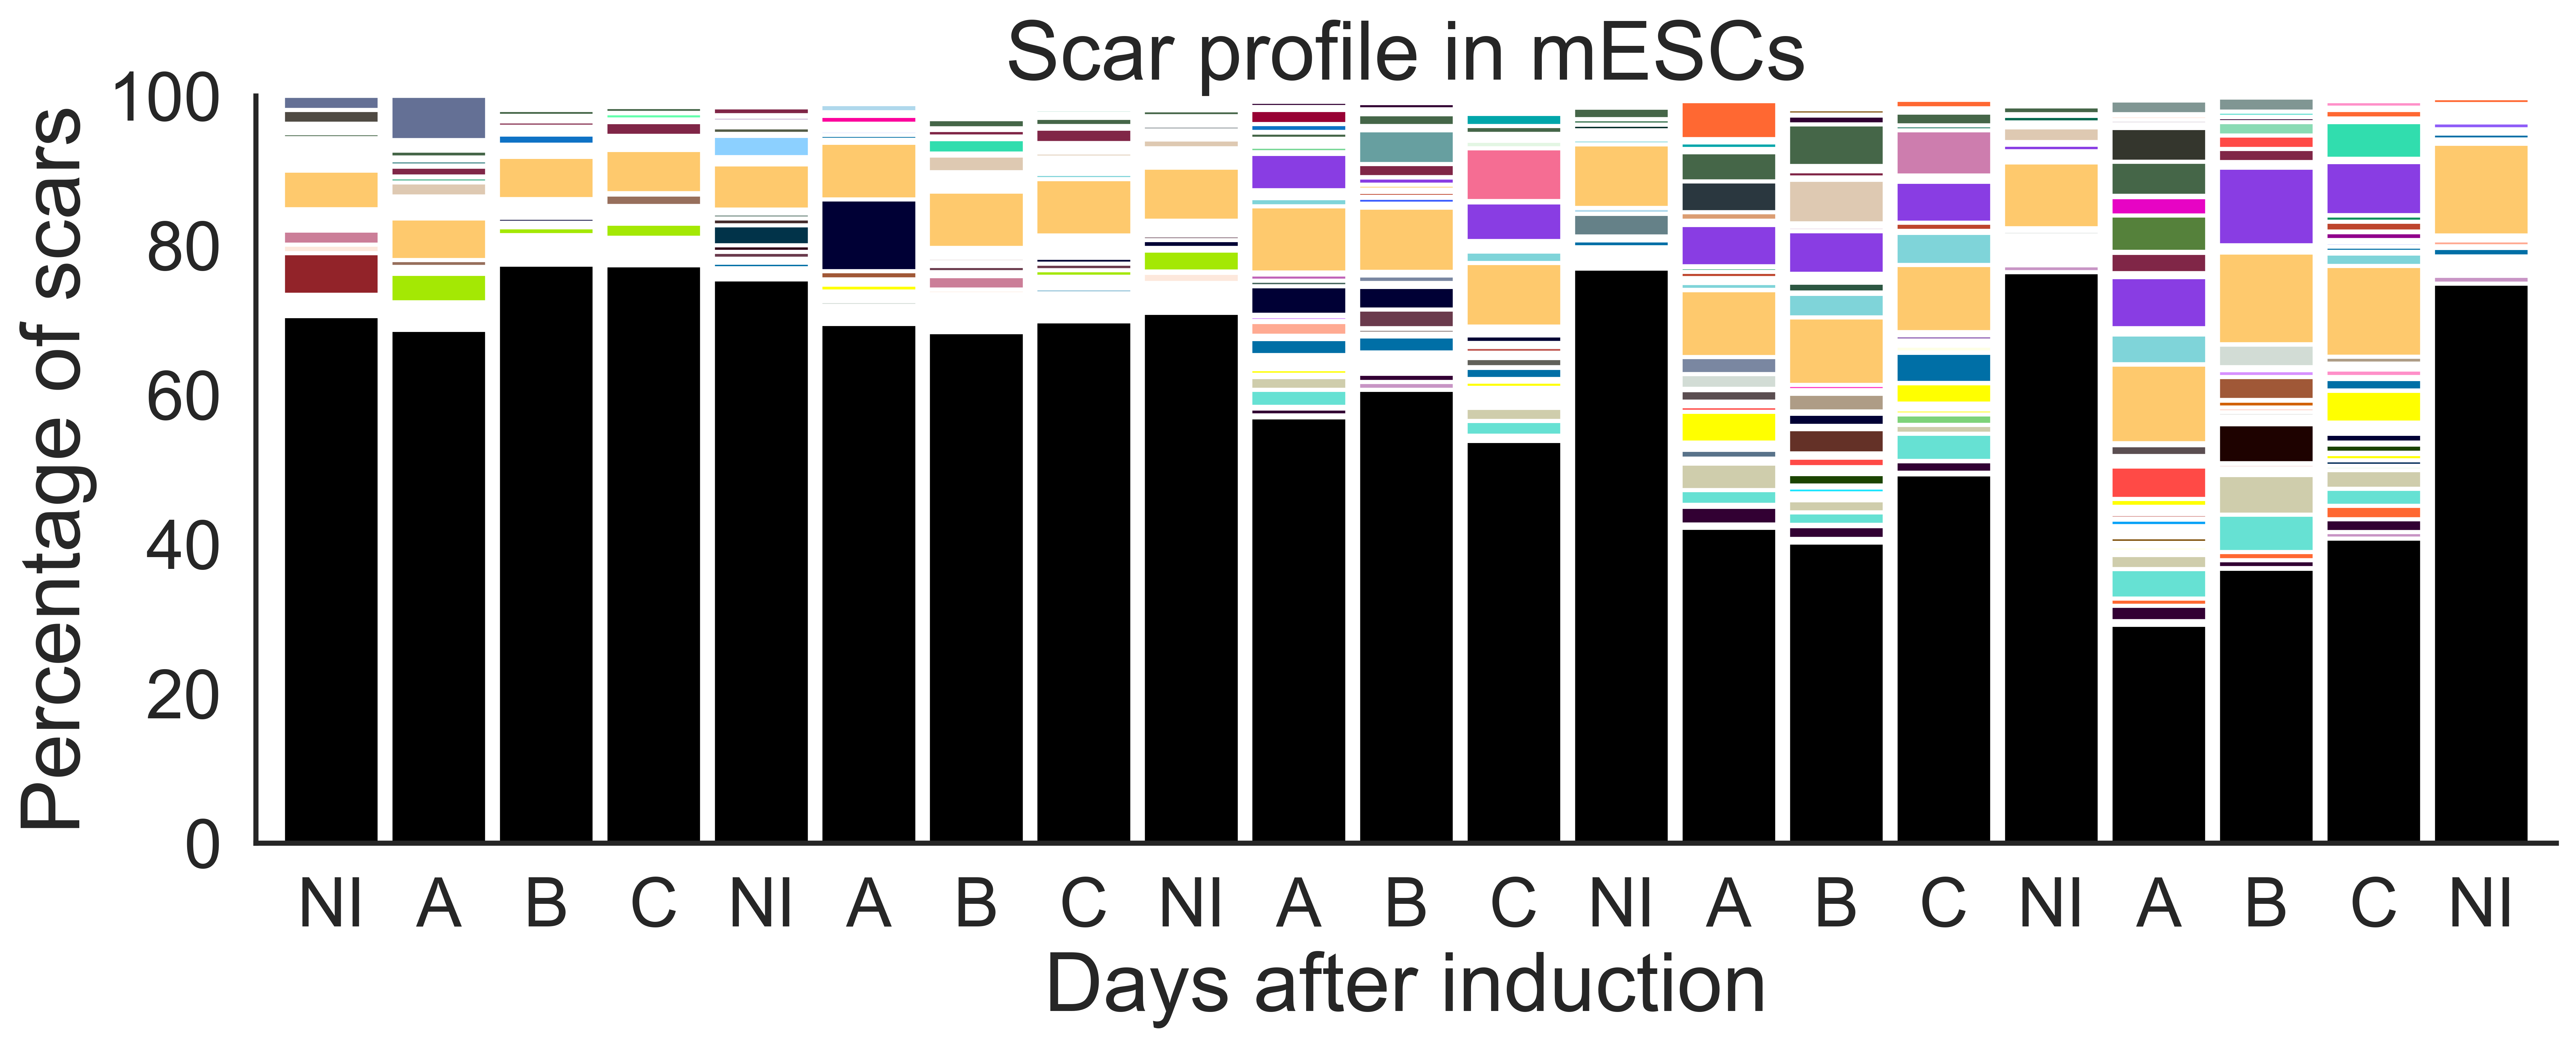

In [301]:
plotAllSamples(percentagepersitepd, title = 'Scar profile in mESCs')

/Users/m.blotenburg/miniconda3/envs/2022env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


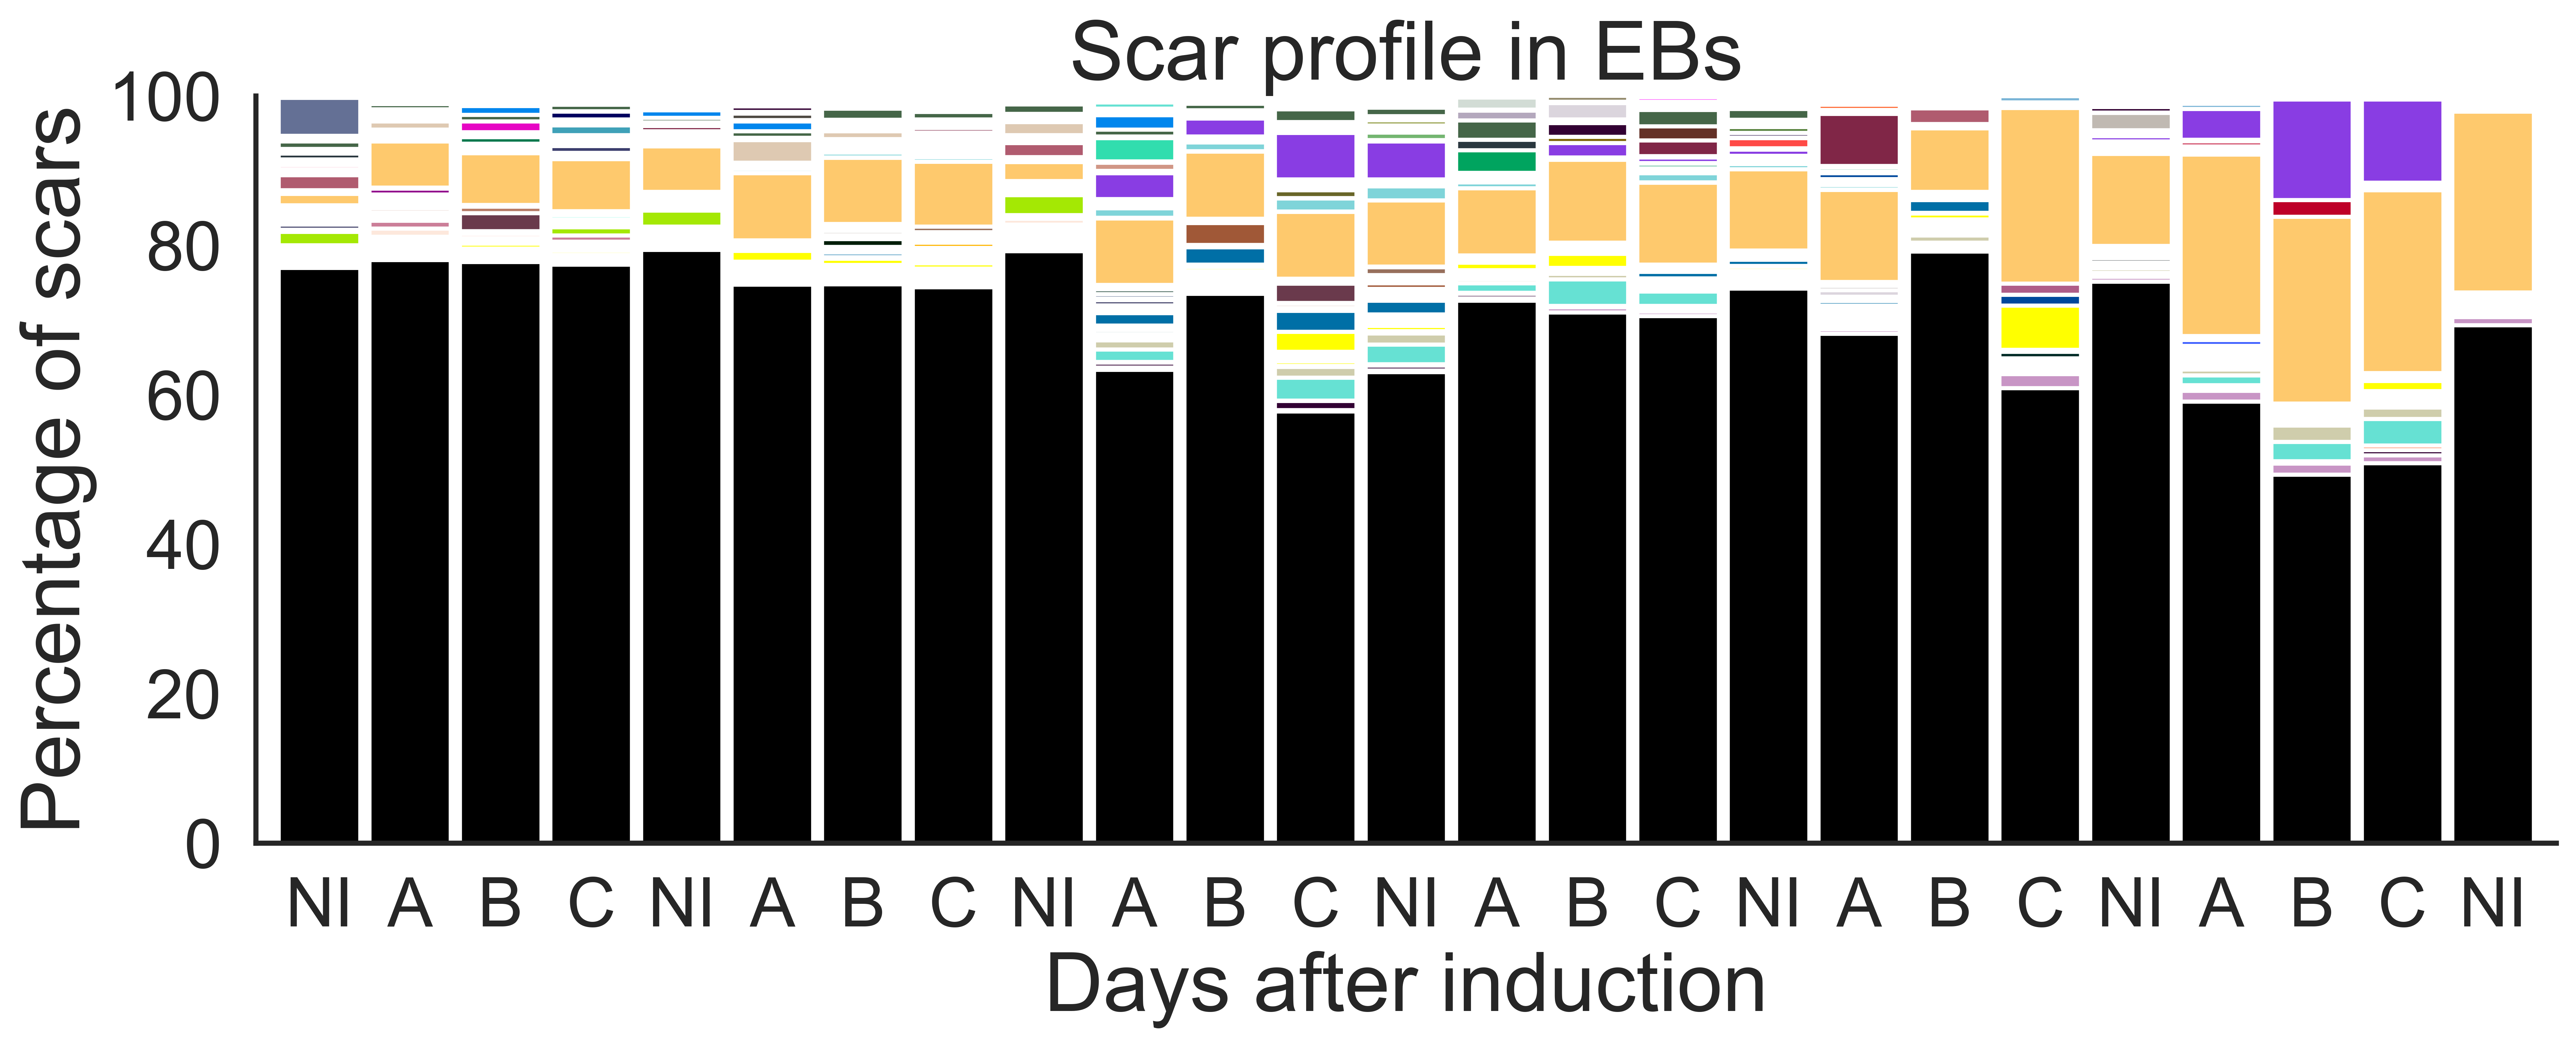

In [337]:
plotAllSamples(percentagepersitepd, title = 'Scar profile in EBs')

Reformat to make line plots

In [32]:
q_df = pd.DataFrame(dict2)

newdict = {}
q_df_noWT = q_df.drop(['WT'], axis = 0)
for sample in q_df_noWT:
    newdict[sample] = len(q_df_noWT[q_df_noWT[sample] >= 0.5])
uniqueScars = pd.DataFrame(list(newdict.items()),columns = ['full_sample','uniqueScars'])

lineplot_df = pd.DataFrame(q_df.loc['WT']).reset_index().rename(columns={'index': 'full_sample'})
day = [ob.split('_')[0] for ob in lineplot_df['full_sample']]
lineplot_df['Day'] = [s.strip('D') for s in day]
sample = [ob.split('_')[1] for ob in lineplot_df['full_sample']]
rep = [s.strip('ESC') for s in sample]
rep = [s.strip('B1') for s in rep]
lineplot_df['Replicate'] = [s.strip('5') for s in rep]
lineplot_df['Sample'] = [s.strip('niabcd') for s in sample]
lineplot_df = lineplot_df[lineplot_df['Sample'] != 'EB1']
lineplot_df['Sample'] = [s.replace('EB5', 'EB') for s in lineplot_df['Sample']]
lineplot_df = lineplot_df[lineplot_df['Day'] != 'sp']
lineplot_df = lineplot_df[lineplot_df['Sample'] != 'sEB']
lineplot_df['Replicate'] = [s.replace('d', 'ni') for s in lineplot_df['Replicate']]
lineplot_df = lineplot_df.rename(columns={'WT':'Percentage'})
lineplot_scars = lineplot_df.copy()
lineplot_scars['Percentage'] = 100 - lineplot_scars['Percentage']
lineplot_scars['Type'] = 'Scar'
lineplot_df['Type'] = 'WT'
lineplot_df = pd.concat([lineplot_df, lineplot_scars])
a = lineplot_df[lineplot_df['full_sample'] == 'D0_ESCni'] 
a['Replicate'] = 'a'
b = lineplot_df[lineplot_df['full_sample'] == 'D0_ESCni'] 
b['Replicate'] = 'b'
c = lineplot_df[lineplot_df['full_sample'] == 'D0_ESCni'] 
c['Replicate'] = 'c'
a1 = lineplot_df[lineplot_df['full_sample'] == 'D0_EBni'] 
a1['Replicate'] = 'a'
b1 = lineplot_df[lineplot_df['full_sample'] == 'D0_EBni'] 
b1['Replicate'] = 'b'
c1 = lineplot_df[lineplot_df['full_sample'] == 'D0_EBni'] 
c1['Replicate'] = 'c'
lineplot_df = pd.concat([a,b,c,a1,b1,c1,lineplot_df]).reset_index().drop(columns = 'index')
lineplot_df = pd.merge(lineplot_df, uniqueScars, left_on='full_sample', right_on='full_sample')
lineplot_df['Day'] = lineplot_df['Day'].astype(np.int64)
lineplot_df

/var/folders/pb/hvc2shb53x194_v0c3h_jyccsf3dhb/T/ipykernel_40099/2893331608.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Replicate'] = 'a'
/var/folders/pb/hvc2shb53x194_v0c3h_jyccsf3dhb/T/ipykernel_40099/2893331608.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['Replicate'] = 'b'
/var/folders/pb/hvc2shb53x194_v0c3h_jyccsf3dhb/T/ipykernel_40099/2893331608.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,full_sample,Percentage,Day,Replicate,Sample,Type,uniqueScars
0,D0_ESCni,70.547914,0,a,ESC,WT,9
1,D0_ESCni,29.452086,0,a,ESC,Scar,9
2,D0_ESCni,70.547914,0,b,ESC,WT,9
3,D0_ESCni,29.452086,0,b,ESC,Scar,9
4,D0_ESCni,70.547914,0,c,ESC,WT,9
...,...,...,...,...,...,...,...
97,D9_EB5a,40.899373,9,a,EB,Scar,9
98,D9_EB5b,49.332103,9,b,EB,WT,6
99,D9_EB5b,50.667897,9,b,EB,Scar,6
100,D9_EB5c,50.853267,9,c,EB,WT,8


In [33]:
lineplot_df_EB = lineplot_df[lineplot_df['Sample'] == 'EB']
lineplot_df_ESC = lineplot_df[lineplot_df['Sample'] == 'ESC']

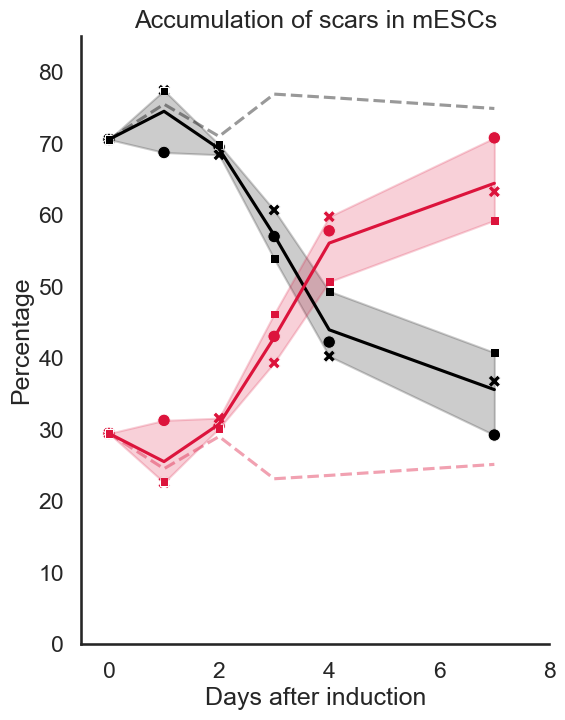

In [34]:
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(6,8), dpi = dpi)

cols = {'WT':'black','Scar':'Crimson'}

sns.scatterplot(x = lineplot_df_ESC[lineplot_df_ESC['Replicate'] != 'ni']['Day'], 
                y = lineplot_df_ESC[lineplot_df_ESC['Replicate'] != 'ni']['Percentage'], ax=ax, 
                hue = lineplot_df_ESC[lineplot_df_ESC['Replicate'] != 'ni']['Type'],
                style = lineplot_df_ESC[lineplot_df_ESC['Replicate'] != 'ni']['Replicate'], 
           palette = cols)
sns.lineplot(x = lineplot_df_ESC[lineplot_df_ESC['Replicate'] != 'ni']['Day'], 
                y = lineplot_df_ESC[lineplot_df_ESC['Replicate'] != 'ni']['Percentage'], ax=ax, 
                hue = lineplot_df_ESC[lineplot_df_ESC['Replicate'] != 'ni']['Type'],
           palette = cols)
sns.lineplot(x = lineplot_df_ESC[lineplot_df_ESC['Replicate'] == 'ni']['Day'], 
                y = lineplot_df_ESC[lineplot_df_ESC['Replicate'] == 'ni']['Percentage'], ax=ax, 
                hue = lineplot_df_ESC[lineplot_df_ESC['Replicate'] == 'ni']['Type'],
           palette = cols, ci = 'sd', alpha = 0.4, 
             linestyle = 'dashed')
  
ax.set_xlim(-0.5,8)
ax.set_ylim(0,85)
ax.set_ylabel("Percentage")
ax.set_xlabel("Days after induction")
ax.set_title("Accumulation of scars in mESCs")
ax.legend([], frameon=False)
#ax.legend(loc = 'upper right')
sns.despine()

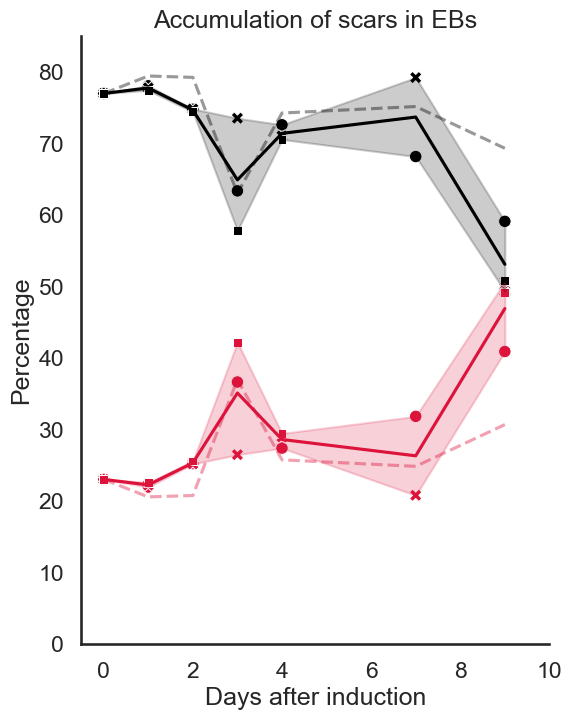

In [35]:
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(6,8), dpi = dpi)

cols = {'WT':'black','Scar':'Crimson'}

sns.scatterplot(x = lineplot_df_EB[lineplot_df_EB['Replicate'] != 'ni']['Day'], 
                y = lineplot_df_EB[lineplot_df_EB['Replicate'] != 'ni']['Percentage'], ax=ax, 
                hue = lineplot_df_EB[lineplot_df_EB['Replicate'] != 'ni']['Type'],
                style = lineplot_df_EB[lineplot_df_EB['Replicate'] != 'ni']['Replicate'],
           palette = cols)
sns.lineplot(x = lineplot_df_EB[lineplot_df_EB['Replicate'] != 'ni']['Day'], 
                y = lineplot_df_EB[lineplot_df_EB['Replicate'] != 'ni']['Percentage'], ax=ax, 
                hue = lineplot_df_EB[lineplot_df_EB['Replicate'] != 'ni']['Type'],
           palette = cols)
sns.lineplot(x = lineplot_df_EB[lineplot_df_EB['Replicate'] == 'ni']['Day'], 
                y = lineplot_df_EB[lineplot_df_EB['Replicate'] == 'ni']['Percentage'], ax=ax, 
                hue = lineplot_df_EB[lineplot_df_EB['Replicate'] == 'ni']['Type'],
           palette = cols, ci = 'sd', alpha = 0.4, 
             linestyle = 'dashed')
    
ax.set_xlim(-0.5,10)
ax.set_ylim(0,85)
ax.set_ylabel("Percentage")
ax.set_xlabel("Days after induction")
ax.set_title("Accumulation of scars in EBs")
ax.legend([], frameon=False)
#ax.legend(loc = 'upper right')
sns.despine()

In [36]:
lineplot_df_ESC2 = lineplot_df_ESC[lineplot_df_ESC['Type'] == 'Scar']
lineplot_df_EB2 = lineplot_df_EB[lineplot_df_EB['Type'] == 'Scar']

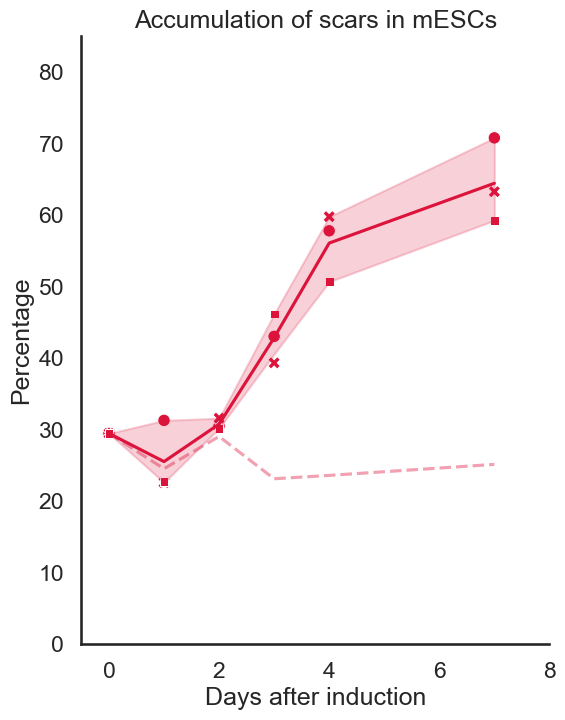

In [37]:
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(6,8), dpi = dpi)

cols = {'WT':'black','Scar':'Crimson'}

sns.scatterplot(x = lineplot_df_ESC2[lineplot_df_ESC2['Replicate'] != 'ni']['Day'], 
                y = lineplot_df_ESC2[lineplot_df_ESC2['Replicate'] != 'ni']['Percentage'], ax=ax, 
                hue = lineplot_df_ESC2[lineplot_df_ESC2['Replicate'] != 'ni']['Type'],
                style = lineplot_df_ESC2[lineplot_df_ESC2['Replicate'] != 'ni']['Replicate'], 
           palette = cols)
sns.lineplot(x = lineplot_df_ESC2[lineplot_df_ESC2['Replicate'] != 'ni']['Day'], 
                y = lineplot_df_ESC2[lineplot_df_ESC2['Replicate'] != 'ni']['Percentage'], ax=ax, 
                hue = lineplot_df_ESC2[lineplot_df_ESC2['Replicate'] != 'ni']['Type'],
           palette = cols)
sns.lineplot(x = lineplot_df_ESC2[lineplot_df_ESC2['Replicate'] == 'ni']['Day'], 
                y = lineplot_df_ESC2[lineplot_df_ESC2['Replicate'] == 'ni']['Percentage'], ax=ax, 
                hue = lineplot_df_ESC2[lineplot_df_ESC2['Replicate'] == 'ni']['Type'],
           palette = cols, ci = 'sd', alpha = 0.4, 
             linestyle = 'dashed')
  
ax.set_xlim(-0.5,8)
ax.set_ylim(0,85)
ax.set_ylabel("Percentage")
ax.set_xlabel("Days after induction")
ax.set_title("Accumulation of scars in mESCs")
ax.legend([], frameon=False)
#ax.legend(loc = 'upper right')
sns.despine()

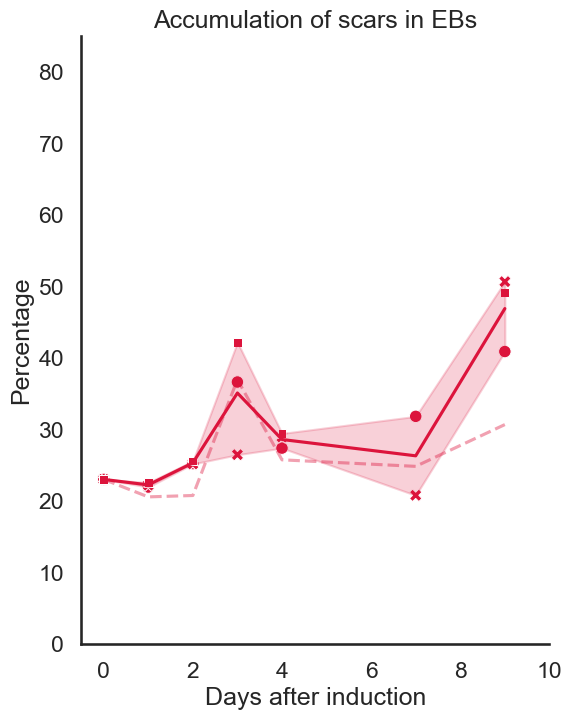

In [38]:
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(6,8), dpi = dpi)

cols = {'WT':'black','Scar':'Crimson'}

sns.scatterplot(x = lineplot_df_EB2[lineplot_df_EB2['Replicate'] != 'ni']['Day'], 
                y = lineplot_df_EB2[lineplot_df_EB2['Replicate'] != 'ni']['Percentage'], ax=ax, 
                hue = lineplot_df_EB2[lineplot_df_EB2['Replicate'] != 'ni']['Type'],
                style = lineplot_df_EB2[lineplot_df_EB2['Replicate'] != 'ni']['Replicate'],
           palette = cols)
sns.lineplot(x = lineplot_df_EB2[lineplot_df_EB2['Replicate'] != 'ni']['Day'], 
                y = lineplot_df_EB2[lineplot_df_EB2['Replicate'] != 'ni']['Percentage'], ax=ax, 
                hue = lineplot_df_EB2[lineplot_df_EB2['Replicate'] != 'ni']['Type'],
           palette = cols)
sns.lineplot(x = lineplot_df_EB2[lineplot_df_EB2['Replicate'] == 'ni']['Day'], 
                y = lineplot_df_EB2[lineplot_df_EB2['Replicate'] == 'ni']['Percentage'], ax=ax, 
                hue = lineplot_df_EB2[lineplot_df_EB2['Replicate'] == 'ni']['Type'],
           palette = cols, ci = 'sd', alpha = 0.4, 
             linestyle = 'dashed')
    
ax.set_xlim(-0.5,10)
ax.set_ylim(0,85)
ax.set_ylabel("Percentage")
ax.set_xlabel("Days after induction")
ax.set_title("Accumulation of scars in EBs")
ax.legend([], frameon=False)
#ax.legend(loc = 'upper right')
sns.despine()

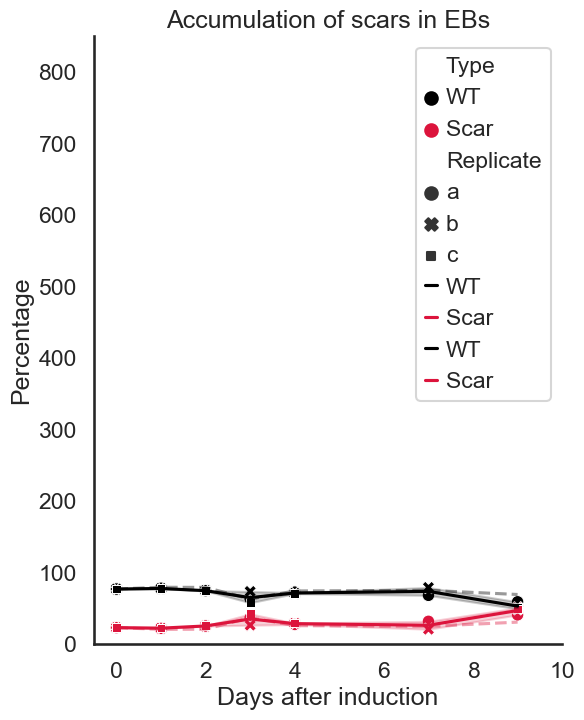

In [39]:
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(6,8), dpi = dpi)

cols = {'WT':'black','Scar':'Crimson'}

sns.scatterplot(x = lineplot_df_EB[lineplot_df_EB['Replicate'] != 'ni']['Day'], 
                y = lineplot_df_EB[lineplot_df_EB['Replicate'] != 'ni']['Percentage'], ax=ax, 
                hue = lineplot_df_EB[lineplot_df_EB['Replicate'] != 'ni']['Type'],
                style = lineplot_df_EB[lineplot_df_EB['Replicate'] != 'ni']['Replicate'],
           palette = cols)
sns.lineplot(x = lineplot_df_EB[lineplot_df_EB['Replicate'] != 'ni']['Day'], 
                y = lineplot_df_EB[lineplot_df_EB['Replicate'] != 'ni']['Percentage'], ax=ax, 
                hue = lineplot_df_EB[lineplot_df_EB['Replicate'] != 'ni']['Type'],
           palette = cols)
sns.lineplot(x = lineplot_df_EB[lineplot_df_EB['Replicate'] == 'ni']['Day'], 
                y = lineplot_df_EB[lineplot_df_EB['Replicate'] == 'ni']['Percentage'], ax=ax, 
                hue = lineplot_df_EB[lineplot_df_EB['Replicate'] == 'ni']['Type'],
           palette = cols, ci = 'sd', alpha = 0.4, 
             linestyle = 'dashed')
    
ax.set_xlim(-0.5,10)
ax.set_ylim(0,850)
ax.set_ylabel("Percentage")
ax.set_xlabel("Days after induction")
ax.set_title("Accumulation of scars in EBs")
#ax.legend([], frameon=False)
ax.legend(loc = 'upper right')
sns.despine()

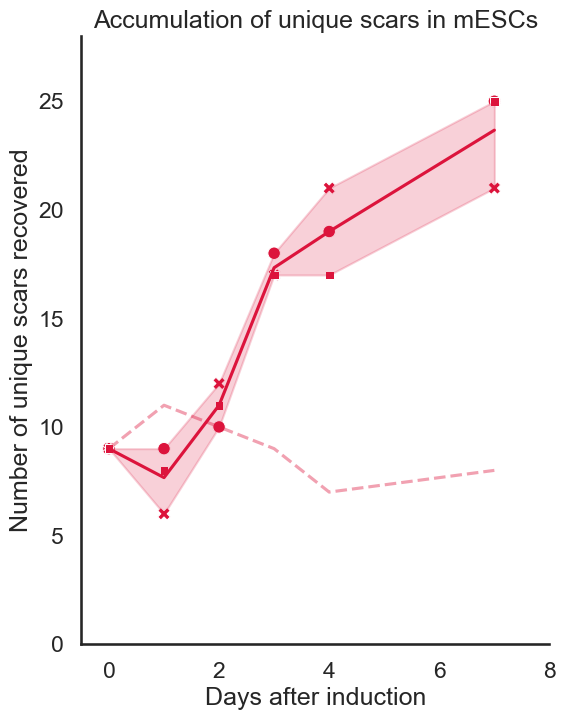

In [40]:
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(6,8), dpi = dpi)

cols = {'WT':'black','Scar':'Crimson'}

lineplot_df_ESC_s = lineplot_df_ESC[lineplot_df_ESC['Type'] == 'Scar']

sns.scatterplot(x = lineplot_df_ESC_s[lineplot_df_ESC_s['Replicate'] != 'ni']['Day'], 
                y = lineplot_df_ESC_s[lineplot_df_ESC_s['Replicate'] != 'ni']['uniqueScars'], ax=ax, 
                hue = lineplot_df_ESC_s[lineplot_df_ESC_s['Replicate'] != 'ni']['Type'],
                style = lineplot_df_ESC_s[lineplot_df_ESC_s['Replicate'] != 'ni']['Replicate'],
           palette = cols)
sns.lineplot(x = lineplot_df_ESC_s[lineplot_df_ESC_s['Replicate'] != 'ni']['Day'], 
                y = lineplot_df_ESC_s[lineplot_df_ESC_s['Replicate'] != 'ni']['uniqueScars'], ax=ax, 
                hue = lineplot_df_ESC_s[lineplot_df_ESC_s['Replicate'] != 'ni']['Type'],
           palette = cols)
sns.lineplot(x = lineplot_df_ESC_s[lineplot_df_ESC_s['Replicate'] == 'ni']['Day'], 
                y = lineplot_df_ESC_s[lineplot_df_ESC_s['Replicate'] == 'ni']['uniqueScars'], ax=ax, 
                hue = lineplot_df_ESC_s[lineplot_df_ESC_s['Replicate'] == 'ni']['Type'],
           palette = cols, ci = 'sd', alpha = 0.4, 
             linestyle = 'dashed')
    
ax.set_xlim(-0.5,8)
ax.set_ylim(0,28)
ax.set_ylabel("Number of unique scars recovered")
ax.set_xlabel("Days after induction")
ax.set_title("Accumulation of unique scars in mESCs")
ax.legend([], frameon=False)
#ax.legend(loc = 'upper right')
sns.despine()

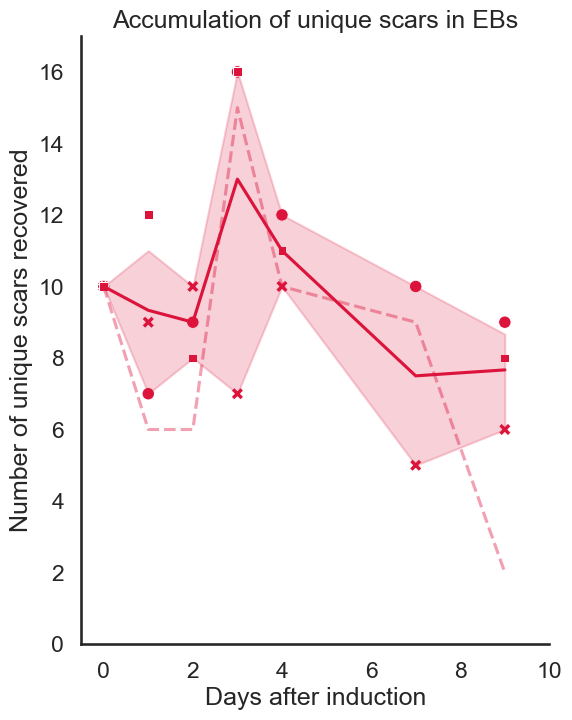

In [41]:
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(6,8), dpi = dpi)

cols = {'WT':'black','Scar':'Crimson'}

lineplot_df_EB_s = lineplot_df_EB[lineplot_df_EB['Type'] == 'Scar']

sns.scatterplot(x = lineplot_df_EB_s[lineplot_df_EB_s['Replicate'] != 'ni']['Day'], 
                y = lineplot_df_EB_s[lineplot_df_EB_s['Replicate'] != 'ni']['uniqueScars'], ax=ax, 
                hue = lineplot_df_EB_s[lineplot_df_EB_s['Replicate'] != 'ni']['Type'],
                style = lineplot_df_EB_s[lineplot_df_EB_s['Replicate'] != 'ni']['Replicate'],
           palette = cols)
sns.lineplot(x = lineplot_df_EB_s[lineplot_df_EB_s['Replicate'] != 'ni']['Day'], 
                y = lineplot_df_EB_s[lineplot_df_EB_s['Replicate'] != 'ni']['uniqueScars'], ax=ax, 
                hue = lineplot_df_EB_s[lineplot_df_EB_s['Replicate'] != 'ni']['Type'],
           palette = cols)
sns.lineplot(x = lineplot_df_EB_s[lineplot_df_EB_s['Replicate'] == 'ni']['Day'], 
                y = lineplot_df_EB_s[lineplot_df_EB_s['Replicate'] == 'ni']['uniqueScars'], ax=ax, 
                hue = lineplot_df_EB_s[lineplot_df_EB_s['Replicate'] == 'ni']['Type'],
           palette = cols, ci = 'sd', alpha = 0.4, 
             linestyle = 'dashed')
    
ax.set_xlim(-0.5,10)
ax.set_ylim(0,17)
ax.set_ylabel("Number of unique scars recovered")
ax.set_xlabel("Days after induction")
ax.set_title("Accumulation of unique scars in EBs")
ax.legend([], frameon=False)

sns.despine()